In [6]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import numpy as np
import time
import copy
import json
import pandas as pd

In [7]:
nasdaq = pd.read_csv('all_2019-08-28.csv')
nasdaq.head()

,article_time,appears_in,article_content,article_link,article_title,author_link,author_name,symbols
0,2006-04-02 10:12:10,"PersonalFinance,CreditandDebt",If you are a savvy taxpayer and have already f...,https://www.nasdaq.com/article/got-a-tax-refun...,Got a tax refund? Then get out of credit card ...,https://www.nasdaq.com/author/credit-cards,"By Ben Woolsey, CreditCards.com",NaN
1,2007-05-16 08:54:43,"PersonalFinance,CreditandDebt",Trying to borrow money without a good credit h...,https://www.nasdaq.com/article/secured-credit-...,"Secured credit cards can help build, repair yo...",https://www.nasdaq.com/author/credit-cards,"By Jeremy Simon, CreditCards.com",NaN
2,2007-10-27 07:08:05,"PersonalFinance,CreditandDebt","When a disaster strikes, credit cards can be a...",https://www.nasdaq.com/article/faqs-about-cred...,FAQs about credit cards and disasters,https://www.nasdaq.com/author/credit-cards,"By Connie Prater, CreditCards.com",NaN
3,2007-12-03 11:13:59,"PersonalFinance,CreditandDebt",The end of the year is the time to consider wr...,https://www.nasdaq.com/article/credit-cards-qu...,"Credit cards quickly fund charities, deliver t...",https://www.nasdaq.com/author/credit-cards,"By Ben Woolsey and Kelly Dilworth, CreditCards...",NaN
4,2007-12-03 11:13:59,"PersonalFinance,CreditandDebt",The end of the year is the time to consider wr...,https://www.nasdaq.com/article/charitable-dona...,Charitable donation by credit card gives quick...,https://www.nasdaq.com/author/credit-cards,"By Ben Woolsey and Kelly Dilworth, CreditCards...",NaN


In [18]:
nasdaq['appears_in'][[50, 101, 240]]

50     PersonalFinance,CreditandDebt
101            Investing,Commodities
240     Investing,Energy,ETFs,Stocks
Name: appears_in, dtype: object

In [22]:
content = nasdaq['article_content'][[50, 101, 240]]

In [25]:
nasdaq['article_content'][240]

"Just as important as \ndeciding to go long natural gas\n\nis how that view is translated into an investing strategy. The\nvalue chain of the natural gas industry, shown below (Source:\nWikinvest), provides a good overview. There are numerous investment\nopportunities throughout the value chain that can be capitalized\nupon.Betting on the actual spot price:1.Buying natural gas futures outright - If you have access to\nthe futures market, are experienced enough to understand its\nintricacies and have enough capital, then take a dip in natural gas\nfutures. The December futures are already trading at a 14% premium\nto the November futures, on the hopes of a cold winter pulling up\ndemand. Inexperienced investors should probably stay away from the\nfutures market.2.Buying ETFs that hold natural gas futures - The biggest and\nmost liquid one of these is the United States Natural Gas Fund (\n\nUNG\n\n). Many authors on Seeking Alpha have mentioned how UNG has been\ndoomed by the contango in

In [26]:
import re 
#remove_chars = '[0-9’!"#$%&\'()*+-/<=>@★、…【】《》“”‘’！[\\]^_`{|}~]+'
content1 = [re.sub('\r', ' ', c) for c in content]
content2 = [re.sub('\n', ' ', c) for c in content1]
content3 = [re.sub('\xa0', ' ', c) for c in content2]
#content4 = [e.sub(remove_chars, '', c) for c in content3]
con = (" ".join(str(i) for i in content3))

In [27]:
con

"Credit Card Accountability Responsibility and Disclosure Act of 2009, commonly called the CARD Act, is a federal law that fundamentally changed credit card issuers' practices and consumers' rights. Here is a brief guide to its history and its 12 biggest consumer protections.CARD Act timeline   After years of complaints about gotcha fine print and confusing terms, Congress passed and President Obama signed May 22, 2009, a reform law that mandated more transparency and easier-to-understand terms.   The law directed several federal agencies to work out the fine details of enforcement, and they did so over the two years following the CARD Act's enactment.What has the law meant for cardholders? Credit card users are protected from retroactive interest rate increases on existing card balances and have more time to pay their monthly bills, greater advance notice of changes in credit card terms and the right to opt out of significant changes in terms on their accounts. The law gave consumers 

In [28]:
sentences = re.split('[.,?!;]',con) 
remove_chars = '[0-9’!"#$%&\'()*+-/<=>@★、…【】《》“”‘’！[\\]^_`{|}~]+'
sentences1 = [re.sub(remove_chars, '', c) for c in sentences]
new_sents = []
for i in range(int(len(sentences1)/2)):
    sent = sentences1[2*i] + sentences1[2*i+1]
    new_sents.append(sent)

In [29]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
def tokenize(corpus):
    results = []
    for text in corpus:
        tmp = text.split(r' ')
        norm = [w.lower() for w in tmp]
        lemmatizer = WordNetLemmatizer()
        lem = [lemmatizer.lemmatize(n) for n in norm]
        filt = [w for w in lem if w not in stopwords.words('english')]
        results.append(" ".join(filt))
    
    return results

In [30]:
def remove_stop_words(corpus):
    stop_words = ["a", "about", "above", "above", "across", "after", "afterwards", "again",
                  "against", "all", "almost", "alone", "along", "already", "also","although",
                  "always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another",
                  "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  
                  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before",
                  "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", 
                  "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", 
                  "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", 
                  "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", 
                  "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", 
                  "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", 
                  "former", "formerly", "forty", "found", "four", "from", "front", "full", "further",
                  "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", 
                  "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", 
                  "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", 
                  "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", 
                  "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", 
                  "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", 
                  "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", 
                  "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", 
                  "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", 
                  "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", 
                  "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", 
                  "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", 
                  "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", 
                  "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there",
                  "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they",  "third",
                  "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", 
                  "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", 
                  "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", 
                  "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", 
                  "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", 
                  "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", 
                  "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "--", "(", ")"]
    results = []
    for text in corpus:
        tmp = text.split(r' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [31]:
tok = tokenize(new_sents)
corpus = remove_stop_words(tok)

In [32]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

In [33]:
len(words)

850

In [34]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [35]:
len(data)

5644

In [36]:
for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])


credit card accountability responsibility disclosure act  commonly called card act
 federal law fundamentally changed credit card issuer practice consumer right brief guide history  biggest consumer protection
card act timeline   year complaint gotcha fine print confusing term congress passed president obama signed 
  reform law mandated transparency easiertounderstand term
   law directed federal agency work fine enforcement year following card act enactment
ha law meant cardholder credit card user protected retroactive rate increase existing card balance time pay monthly
 greater advance notice change credit card term right opt significant change term account law gave consumer bit time   day instead   shop better deal dont like new term
card act consumer protection phased  month provision took effect aug
  
 majority rule started feb 
    final batch kicked aug
    
card act highlight   highlight credit card law: limited rate hikes:  interest rate hike existing balance allowed limite

In [37]:
word2int

{'': 0,
 'act': 1,
 'oz': 2,
 'ground': 3,
 'focus': 4,
 'vice': 5,
 'rare': 6,
 'aug': 7,
 'source:': 8,
 'kinrosss': 9,
 'tell': 10,
 'disclose': 11,
 'lost': 12,
 'actually': 13,
 'gazprom': 14,
 'information': 15,
 'famously': 16,
 'closed': 17,
 'institute': 18,
 'alpha': 19,
 'limit': 20,
 'ton': 21,
 'called': 22,
 'preliminary': 23,
 'holder': 24,
 'thursday': 25,
 'avoiding': 26,
 'dropback': 27,
 'advocacy': 28,
 'operates': 29,
 'close': 30,
 'hnu': 31,
 'protect': 32,
 'giving': 33,
 'reading': 34,
 'ounce': 35,
 'doomed': 36,
 'sooner': 37,
 'gift': 38,
 'price': 39,
 'mining': 40,
 'contract': 41,
 'excess': 42,
 'afternoon': 43,
 'term': 44,
 'tsx': 45,
 'russia': 46,
 'chief': 47,
 'nasdaq': 48,
 'right': 49,
 'period': 50,
 'resource': 51,
 'unused': 52,
 'vast': 53,
 'invest': 54,
 'feethe': 55,
 'stocking': 56,
 'contango': 57,
 'default:': 58,
 'physical': 59,
 ':': 60,
 'invested': 61,
 'view': 62,
 'actual': 63,
 'investing': 64,
 'longerterm': 65,
 'sheet': 66,
 

In [38]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

Instructions for updating:
non-resource variables are not supported in the long term


In [39]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  9.322379
iteration 3000 loss is :  7.093714
iteration 6000 loss is :  6.89417
iteration 9000 loss is :  6.7504935
iteration 12000 loss is :  6.617637
iteration 15000 loss is :  6.5067773
iteration 18000 loss is :  6.410239


In [41]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[-0.18563041 -0.9875809 ]
 [ 0.8006527   1.288577  ]
 [ 1.041214    1.5555428 ]
 ...
 [-0.31125602  1.6003239 ]
 [ 0.3073539   0.12843159]
 [ 0.8372282  -0.03753543]]


In [42]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
#w2v_df.to_csv('word10.csv')

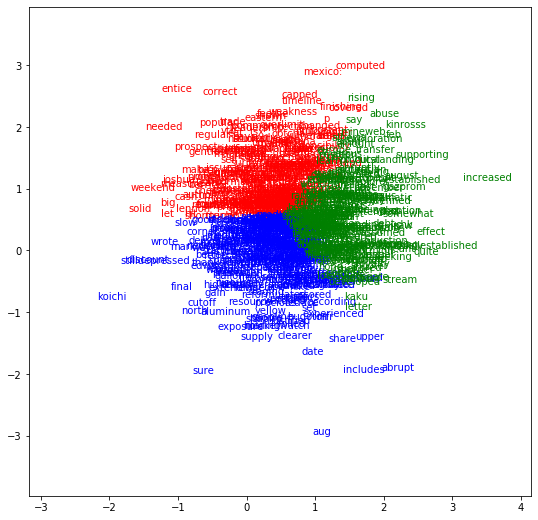

In [47]:
plt.rcParams['figure.figsize'] = (9,9)
fig, ax = plt.subplots()

c1 = w2v_df[w2v_df['3clusters']==0]
c2 = w2v_df[w2v_df['3clusters']==1]
c3 = w2v_df[w2v_df['3clusters']==2]
#c4 = w2v_df[w2v_df['5clusters']==3]
#c5 = w2v_df[w2v_df['5clusters']==4]


for word, x1, x2 in zip(c1['word'], c1['x1'], c1['x2']):
    ax.annotate(word, (x1,x2),color = 'red')
for word, x1, x2 in zip(c2['word'], c2['x1'], c2['x2']):
    ax.annotate(word, (x1,x2),color = 'blue')
for word, x1, x2 in zip(c3['word'], c3['x1'], c3['x2']):
    ax.annotate(word, (x1,x2),color = 'green')
#for word, x1, x2 in zip(c4['word'], c4['x1'], c4['x2']):
    #ax.annotate(word, (x1,x2),color = 'orange')
#for word, x1, x2 in zip(c5['word'], c5['x1'], c5['x2']):
    #ax.annotate(word, (x1,x2),color = 'black')

    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
#plt.rcParams["figure.figsize"] = (10,10)

plt.savefig('text_clusters.png', transparent=True)

In [44]:
#Euclidean distance
def dist(a, b):
    return np.linalg.norm(a - b, None)
#Tau-distance
def dist_fun(a,m,tau):
    dist = np.zeros(len(m))
    for i in range(len(m)):
        d = a - m[i]
        ele = 0
        for j in range(len(d)):
            col = d[j]
            ad = (1-tau[i,j])* sum(col[col<0]**2) + tau[i,j]* sum(col[col>=0]**2)
            ele = ele + ad
        dist[i] = ele
    return dist
#Expectile estimation
def expectile_fun(group, tau):
    e = np.mean(group, axis=0)
    e_new = np.zeros(e.shape)
    while dist(e_new , e) != 0:
        c = group[:,:]- e
        e = copy.deepcopy(e_new)
        for i in range(len(c[0])):
            d = c[:,i]
            a_co = group[:,i]
            neg = a_co[d<0]
            pos = a_co[d>=0]
            norm = tau[i]*len(pos)+ (1-tau[i])*len(neg)
            e_new[i] = (tau[i]* sum(pos) + (1-tau[i])* sum(neg))/norm
    return  e_new
#Estimate optimal taus
def tau_fun(points, mu):
    tau_list = []
    dis = points - mu
    for i in range(len(mu)):
        res = dis[:,i]
        e_neg = -sum(res[res < 0])/len(res[res < 0])
        e_pos = sum(res[res >= 0])/len(res[res >= 0])
        c = e_neg/e_pos
        tau = c/(1+c)
        tau_list.append(tau)
    return tau_list
# Define K expectile clustering 
def k_expectile_new(X, k): 
    X = np.array(X)
# Initialize cluster centers as K means cluster centers
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    C = kmeans.cluster_centers_

# To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    clusters = np.zeros(len(X))
# Initialize tau = 0.5
    tau_list = np.ones((k, len(C[0])))*0.5
# Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old)
# Loop will run till the error 
    #while error >= 0.5:
    for r in range(10):
    # Assigning each value to its closest cluster
        for i in range(len(X)):
            for j in range (len(C[0])):
                distances = dist_fun(X[i], C, tau_list)
                cluster = np.argmin(distances)
                clusters[i] = cluster
    # Storing the old centroid values
        C_old = copy.deepcopy(C)
    # Finding the new centroids and tau
        for d in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == d]
            points = np.array(points)
    # Updating taus
            tau = tau_fun(points,C[d])
            C[d] = expectile_fun(points,tau)
            tau_list[d] = tau
        error = dist(C, C_old)
        #print(tau_list)
        print(error)
    return C, clusters

In [45]:
C1, clusters1 = k_expectile_new(vectors, 3)

0.096382186
0.0491562
0.026128998
0.017582793
0.013547801
0.010896114
0.0050791334
0.003520586
0.005146272
0.0045679086


In [46]:
w2v_df['3clusters'] = clusters1
w2v_df = w2v_df[['word', 'x1', 'x2','3clusters']]

In [82]:
#c1 = w2v_df[w2v_df['3clusters']==0]['word']
#c2 = w2v_df[w2v_df['3clusters']==1]['word']
c3 = w2v_df[w2v_df['3clusters']==2]['word']
#c4 = w2v_df[w2v_df['5clusters']==3]['word']
#c5 = w2v_df[w2v_df['5clusters']==4]['word']
con2 = (" ".join(str(i) for i in c3))
con2

'haphazardly ocwen check law: lending private delinquent thing adult cent basis exist disclose carry advocacy lender writedowns second ocn belief credit boom first: matter compared use condition seventy deposit meantime sixmonth lowestinterest high consumer capital young agree program earningsbut servicers saxon paid sale future crackup started costtoservice variable user home close common card highlight congress script outstanding quite protected retroactive majority boost doe wish somebody business mean actually fraction history know seekingalpha fundamentally different add staff campus lowcost beginning wu following barreled subprime going nonperforming intelligence unlikely bleeding feethe repay offered previous changed protect competitor accountability materially pain holding avoided depository major cardholder thats rate income per act reject feb heard ceased including vast clearer mid endured everything holder highest notice typical hike higher point information increase total d